In [7]:
import numpy as np
import matplotlib.pyplot as plt
from ppr.robot import Robot_2P3R,Robot_3R
from ppr.path import TrajectoryPt, TolerancedNumber
from ppr.geometry import Rectangle
from ppr.sampling import cart_to_joint, get_shortest_path

In [8]:
# ROBOT
robot1 = Robot_2P3R([1, 1, 2, 1.2, 1])
robot1.set_joint_limits([(0.5, 1.0), (2.0, 3.0)])
robot1.ik_samples = [3, 5]

# PATH
dx    = TolerancedNumber(0.5, 0.3, 0.8, samples=4)
dy    = np.linspace(2, 2.5, 5)
angle = TolerancedNumber(0.0, -np.pi, 0, samples=10)
path1 = [TrajectoryPt([dx, yi, angle]) for yi in dy]

# COLLISION SCENE
sc1 = [Rectangle(1, 1, 1, 1.5, 0),
       Rectangle(3, 1, 1, 2.2, 0),
       Rectangle(0, 3.2, 4, 0.5, 0),
       Rectangle(0, 1, 0.2, 3.2, 0),
       Rectangle(0.2, 1, 0.8, 0.5, 0)]

In [9]:
from ppr.sampling import iterative_bfs

In [10]:
sol = iterative_bfs(robot1, path1, sc1, tol=1e-6)

converting type of Q
[ 3  4 13 40 70]
converting type of Q
[203 291 370 417  87]
converting type of Q
[  0 449  16  13 388]
converting type of Q
[ 61 540 108 147 448]
converting type of Q
[ 16 497  77 149 597]
converting type of Q
[212 512  47 146 144]
converting type of Q
[242 525  15 111 291]
converting type of Q
[365  76  46  10 363]
converting type of Q
[ 62 512  45 132  91]


True


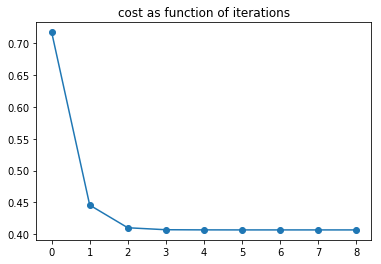

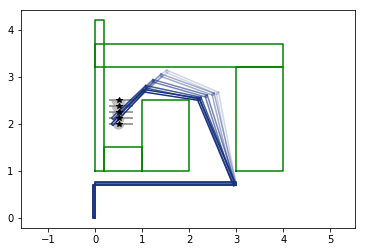

In [11]:
print(sol['success'])

plt.plot(sol['length_all_iterations'], 'o-')
plt.title("cost as function of iterations")
plt.show()

fig2, ax2 = plt.subplots()
ax2.axis('equal')
#robot1.plot_path_kinematics(ax2, path_js[2])
robot1.plot_path(ax2, sol['path'])
for r in sc1: r.plot(ax2, 'g')
for tp in path1: tp.plot(ax2)
plt.show()

# compare with optimisation based approach

In [12]:
# set mass, cg-positoin and mass moment of inertia for each link
robot1.set_link_inertia([1, 1, 1, 0.5, 0.5],
                        [0.5, 0.5, 0.25, 0.25, 0.15],
                        [0.05, 0.05, 0.05, 0.05, 0.05])

# use the sampling based solution as initial guess
q_init = sol['path']

In [15]:
from ppr.optim import get_optimal_trajectory

q_opt, dq_opt, ddq_opt = get_optimal_trajectory(robot1, path1, q_init,
                                               check_collision=True, scene=sc1)

Iteration limit exceeded    (Exit mode 9)
            Current function value: 0.21310780196076207
            Iterations: 101
            Function evaluations: 2982
            Gradient evaluations: 98


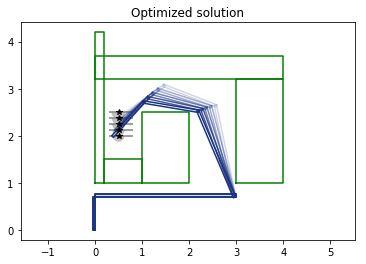

In [16]:
fig4, ax4 = plt.subplots()
plt.title("Optimized solution")
ax4.axis('equal')
robot1.plot_path(ax4, q_opt)
for tp in path1: tp.plot(ax4)
for r in sc1: r.plot(ax4, 'g')
plt.show()

In [20]:
np.sum(np.abs(np.diff(q_opt, axis=0)))

0.21310780196076207

In [21]:
np.sum(np.abs(np.diff(sol['path'], axis=0)))

0.4066651463508606